# Run TCLab Experiments

Alex Dowling, University of Notre Dame

## Setup

In [2]:
# Install Pyomo and solvers for Google Colab
import sys

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py"
    import colab_helper

    colab_helper.install_idaes()
    colab_helper.install_ipopt()

# Set plotting defaults
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=3)

## Load Control Signal

In [3]:
import pandas as pd

# input_data = pd.read_csv('./data/u_via_GP_of_resid_with_du_penalty.csv')
# input_data = pd.read_csv('./data/solution_benchmark_0o5du1.csv')
# input_data = pd.read_csv('./data/tclab_final_as_of_20240807__u_GP.csv')
# input_data = pd.read_csv('./data/tclab_final_as_of_20240807__u_GP_trained_w_Tset_results_appended.csv')

# input_data.head()

# input_data.plot(x='Time', y='Q1', title='Open-Loop Optimal Control Signal', legend=False)
# plt.show()

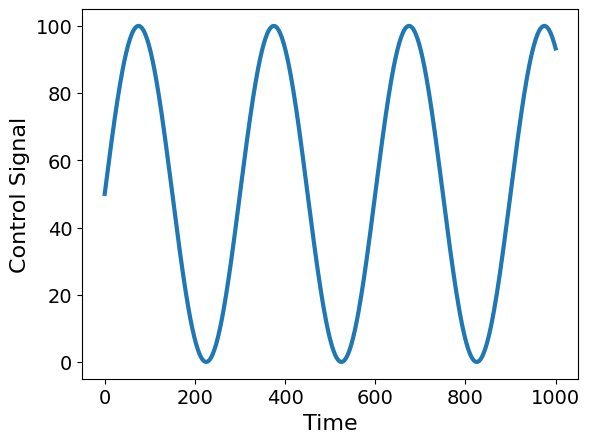

In [4]:
import numpy as np

def control_signal(t, period=5*60, amplitude=50):
    # return np.interp(t, input_data['Time'], input_data['Q1'])
    return 50 + amplitude*np.sin(2*np.pi/period*t)  # period in seconds

t_plot = np.linspace(0, 1000, 500)

plt.plot(t_plot, control_signal(t_plot))
plt.xlabel('Time')
plt.ylabel('Control Signal')
plt.show()

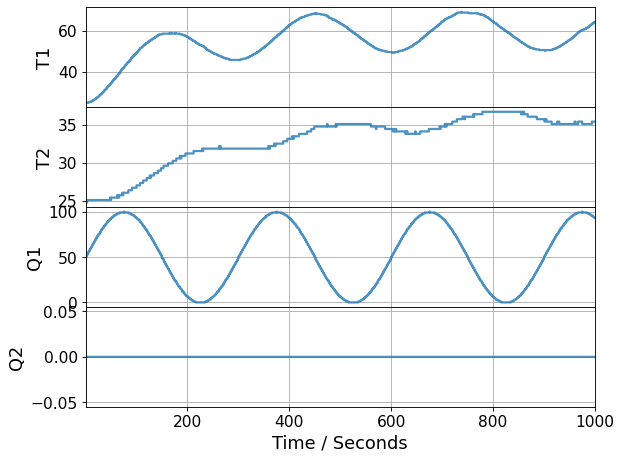

TCLab disconnected successfully.


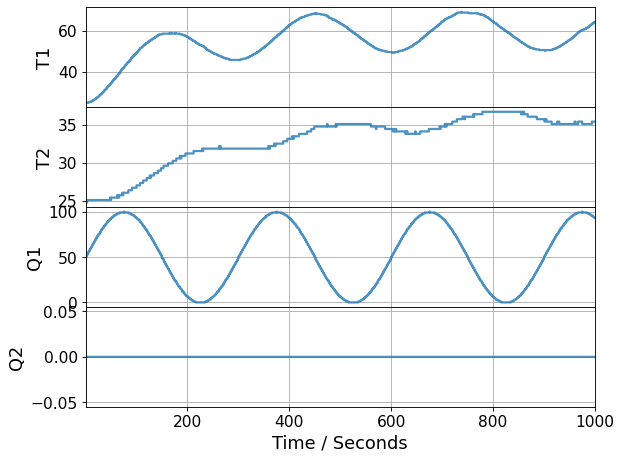

In [5]:
from tclab import TCLab, clock, Historian, Plotter

# experimental parameters
P1 = 200
tfinal = 1000

# perform experiment
with TCLab() as lab:
    lab.P1 = P1
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    lab.Q1(control_signal(0))
    for t in clock(tfinal):
        lab.Q1(control_signal(t))
        p.update(t)

In [6]:
experiment_name = '_sin_5_50'
data_file = '../data/validation_experiment' + experiment_name + '.csv'
h.to_csv(data_file)